In [ ]:
# 建立資料庫 將id欄位作為識別碼 INTERGER PRIMARY KEY AUTOINCREMENT

import sqlite3
conn_1=sqlite3.connect('myInfo.db')
conn_2=sqlite3.connect('myInfo2.db')
# cursor=conn_1.cursor()  # 也可以省略
sql_1='''Create table students(
        id_ int,  
        name TEXT,
        gender TEXT)'''
sql_2='''Create table student2(
        id INTEGER PRIMARY KEY AUTOINCREMENT, 
        name TEXT,
        gender TEXT)'''
# cursor.execute(sql_1)
# cursor.close()  # 也可以省略
conn_1.execute(sql_1)
conn_2.execute(sql_2)
conn_1.close()
conn_2.close()

In [ ]:
# 建立資料庫 輸入3個欄位增加表單增加表單 myInfo.db 自行加上只能輸入y或n

import sqlite3
no='yes'
conn=sqlite3.connect('myInfo.db')

while True:
    if no =='yes':
        no='yes'
        print('請輸入myInfo資料庫students表單資料')
        new_id=int(input("請輸入id:"))  # 轉成整數
        new_name=input("請輸入name:")
        new_gender=input("請輸入gender:")
        new_datas=(new_id,new_name,new_gender)
        sql='''insert into students values(?,?,?)'''  # 將輸入的資料增加到資料庫
        conn.execute(sql,new_datas)
        conn.commit()   # 更新資料庫
        no='no'
    else: 
        # 判斷只能輸入y或n
        again=input("繼續(y/n)?")      
        if again[0].lower()=='n':
            break
        elif again[0].lower()=='y':
            no='yes'
            continue
        else:
            print('無效的字元')
            no='no'
conn.close()

In [ ]:
# 使用id欄位自動增值的方式 myInfo2.db

import sqlite3
conn=sqlite3.connect('myInfo2.db')
while True:
    new_name=input("請輸入name:")
    new_gender=input("請輸入gender:")
    new_datas=(new_name,new_gender)
    # 使用自動增值的方式 在表單內加上欄位student2(name, gender)
    sql='''insert into student2(name,gender) values(?,?)''' 
    conn.execute(sql,new_datas)
    conn.commit()
    again=input('繼續(y/n)?')
    if again.lower()=='n':
        break
conn.close()

In [ ]:
# 列出所有資料表單

import sqlite3
conn=sqlite3.connect('myInfo.db')
results=conn.execute('SELECT * from students')  # '''SELECT查詢 *所有的 from 表單名稱'''
for r in results:
    print('id:',r[0])
    print('name:',r[1])
    print('gender:',r[2])
conn.close()

In [ ]:
# 以fetchall()列出表單所有查詢到的人

import sqlite3
conn=sqlite3.connect('myInfo2.db')
results=conn.execute('SELECT * from student2')         
results_name=conn.execute('SELECT name from student2')  # 只印出想搜尋的欄位 '''SELECT 欄位名稱'''
sql='''SELECT name,gender from student2 where gender="M"'''
results_gender=conn.execute(sql)  # where條件
all_student2=results.fetchall()
all_student2_name=results_name.fetchall()
for s in all_student2:
    print(s)  
print('\n只印出名字:')
for s in all_student2_name:
    print(s)
print('\n只印出男性:')
for s in results_gender:
    print(s)
    
# '''UPDATE更新表單 set 欄位=新內容 where要改哪個要註明好'''
print('\nUPDATE更新表單:')
sql='''UPDATE student2 set name="Tommy" where name="Chen"'''
results=conn.execute(sql)
conn.commit()
results=conn.execute('SELECT name from student2')
all_student2=results.fetchall()
for s in all_student2:
    print(s)
conn.close()

In [ ]:
# 同上 只是將更新資料庫及印出表單包成def函式 

import sqlite3
conn=sqlite3.connect('myInfo2.db')

# 包成函式 更新資料庫及印出表單
def conn_commit_fn(conn_,sql_):
    conn_.commit()
    results_=conn_.execute(sql_)
    all_student_=results_.fetchall()
    for s in all_student_:
        print(s)
        
sql_1='''SELECT * from student2'''
conn_commit_fn(conn,sql_1)

sql_2='''SELECT name from student2'''  # 只印出想搜尋的欄位 '''SELECT 欄位名稱'''
print('\n只印出名字:')
conn_commit_fn(conn,sql_2)

# '''SELECT尋找 欄位1,欄位2 where條件'''
sql_3='''SELECT name,gender from student2 where gender="M"'''
print('\n只印出男性:')
conn_commit_fn(conn,sql_3)
    
# '''UPDATE更新表單 set 欄位=新內容 where要改哪個要註明好'''
print('\nUPDATE更新表單:')
sql_4='''UPDATE student2 set name="Tommy" where name="Chen"'''
conn.commit()
results_=conn.execute(sql_4)

sql_5='''SELECT name from student2'''
conn_commit_fn(conn,sql_5)

# '''DELETE刪除表單 from 表單 where要改哪個要註明好'''
print('\nDELETE刪除表單:')
sql_6='''DELETE from student2 where id=7'''
conn.commit()
results_=conn.execute(sql_6)
conn_commit_fn(conn,sql_1)

conn.close()

In [1]:
# 將台北人口儲存到SQLite

import sqlite3,csv
conn=sqlite3.connect('populations.db')  # 資料庫連線
# 創建資料表時 注意逗號 因為是以逗號分欄位數
sql='''CREATE table populations(
        area TEXT,
        male int,
        female int,
        total int)'''
conn.execute(sql)

In [2]:
fn='Taipei_Population.csv'  
with open(fn) as csv_file:
    # 使用csv.reader讀取出來的rows會是一個二維的list 還是要記得轉成list
    csv_reader=csv.reader(csv_file)
    csv_list=list(csv_reader)
    csv_data=csv_list[4:]   #前4行row不要 從第4行row開始

    for c_d in csv_data:
        area=c_d[0]
        male=int(c_d[7])
        female=int(c_d[8])
        total=int(c_d[6])
        new_data=(area,male,female,total)   # 將要新增至資料庫的資料轉成tuple
        sql_1='''insert into populations values(?,?,?,?)'''   # 新增至資料庫 搭配下一行
        conn.execute(sql_1,new_data)  
        conn.commit()
        
results=conn.execute('SELECT * from populations')
for r in results:
    print('區域:',r[0])
    print('男性人口數:',r[1])
    print('女性人口數:',r[2])
    print('總計人口數:',r[3])
    
conn.close()

區域:   松山區 
男性人口數: 96357
女性人口數: 109276
總計人口數: 205633
區域:   信義區 
男性人口數: 106330
女性人口數: 116783
總計人口數: 223113
區域:   大安區 
男性人口數: 143905
女性人口數: 164781
總計人口數: 308686
區域:   中山區 
男性人口數: 106562
女性人口數: 122747
總計人口數: 229309
區域:   中正區 
男性人口數: 75840
女性人口數: 83063
總計人口數: 158903
區域:   大同區 
男性人口數: 62124
女性人口數: 65527
總計人口數: 127651
區域:   萬華區 
男性人口數: 92825
女性人口數: 96562
總計人口數: 189387
區域:   文山區 
男性人口數: 131114
女性人口數: 142572
總計人口數: 273686
區域:   南港區 
男性人口數: 59392
女性人口數: 62184
總計人口數: 121576
區域:   內湖區 
男性人口數: 137196
女性人口數: 150246
總計人口數: 287442
區域:   士林區 
男性人口數: 137965
女性人口數: 148374
總計人口數: 286339
區域:   北投區 
男性人口數: 122775
女性人口數: 132408
總計人口數: 255183


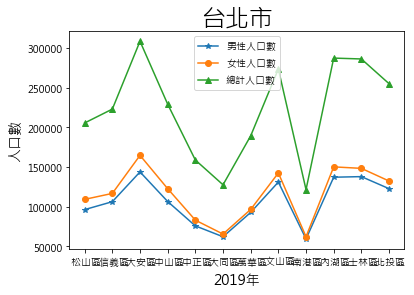

In [26]:
import sqlite3
import matplotlib.pyplot as plt
from pylab import mpl

conn=sqlite3.connect('populations.db')
sql='''SELECT * from populations'''
results=conn.execute(sql)

# 將每個row欄位建成list 方便畫圖用
area_list,male_list,female_list,total_list=[],[],[],[]
for r in results:
    area_list.append(r[0])
    male_list.append(r[1])
    female_list.append(r[2])
    total_list.append(r[3])
conn.close()

 # 使用黑體 一定要設在顯示中文前
mpl.rcParams["font.sans-serif"]=["SimHei"]   

# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 開始畫圖
seq=area_list
linemale,=plt.plot(seq,male_list,'-*',label='男性人口數')
linefemale,=plt.plot(seq,female_list,'-o',label='女性人口數')
linetotal,=plt.plot(seq,total_list,'-^',label='總計人口數')

# 設立標題及細項
plt.legend(handles=[linemale,linefemale,linetotal],loc='upper center')  # 顯示線條圖例 loc=位置
plt.title(u"台北市",fontsize=24)
plt.xlabel(u"2019年",fontsize=14)
plt.ylabel(u"人口數",fontsize=14)
plt.show()